<a href="https://colab.research.google.com/github/smiling621/PRODIGY_DS_05/blob/main/PRODIGY_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [6]:
#here we load the dataset
df = pd.read_excel("/content/Road Accidents.xlsx", sheet_name='2011-1')


In [7]:
df.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,110016014,443330,439205,2,2011-01-12,712,A(M),Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Driver,Slight,Male,62,Car
1,110016024,425059,433371,2,2011-01-12,830,Unclassified,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver,Slight,Female,39,Car
2,110016533,420683,434373,1,2011-01-12,1215,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Pedestrian,Serious,Male,66,Car
3,110017112,431097,433000,1,2011-01-12,1735,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Serious,Male,39,Goods vehicle 3.5 tonnes mgw and under
4,110020375,429523,433820,2,2011-01-12,1230,A,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,29,Car


In [8]:
df.describe()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),Age of Casualty
count,2.604000e+03,2604.000000,2604.000000,2604.000000,2604,2604.000000,2604.000000
mean,1.102817e+08,430127.497696,434243.245392,1.959677,2011-07-08 15:33:27.373271808,1406.221966,35.297235
min,1.100189e+07,415290.000000,424216.000000,1.000000,2011-01-12 00:00:00,5.000000,0.000000
25%,1.101720e+08,427136.500000,431754.500000,2.000000,2011-04-12 18:00:00,1044.500000,21.000000
50%,1.103125e+08,430098.000000,434223.000000,2.000000,2011-07-08 00:00:00,1455.000000,32.000000
75%,1.104574e+08,432513.000000,436165.000000,2.000000,2011-10-05 00:00:00,1750.000000,46.000000
max,1.200074e+08,444895.000000,449409.000000,8.000000,2011-12-31 00:00:00,2355.000000,95.000000
std,1.971720e+06,5118.276964,4383.146273,0.801163,NaN,509.065769,18.491683


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Reference Number     2604 non-null   int64         
 1   Easting              2604 non-null   int64         
 2   Northing             2604 non-null   int64         
 3   Number of Vehicles   2604 non-null   int64         
 4   Accident Date        2604 non-null   datetime64[ns]
 5   Time (24hr)          2604 non-null   int64         
 6   1st Road Class       2604 non-null   object        
 7   Road Surface         2604 non-null   object        
 8   Lighting Conditions  2604 non-null   object        
 9   Weather Conditions   2604 non-null   object        
 10  Casualty Class       2604 non-null   object        
 11  Casualty Severity    2604 non-null   object        
 12  Sex of Casualty      2604 non-null   object        
 13  Age of Casualty      2604 non-nul

In [12]:
#for missing value
df.isnull().sum()

Reference Number       0
Easting                0
Northing               0
Number of Vehicles     0
Accident Date          0
Time (24hr)            0
1st Road Class         0
Road Surface           0
Lighting Conditions    0
Weather Conditions     0
Casualty Class         0
Casualty Severity      0
Sex of Casualty        0
Age of Casualty        0
Type of Vehicle        0
dtype: int64

In [13]:
df.dropna(inplace=True)



In [14]:
# Handle duplicates
df.drop_duplicates(inplace=True)

In [20]:
#convert datetime format
df['Date'] = pd.to_datetime(df['Accident Date'], format='%Y-%m-%d')



ROAD CONDITION ANALYSIS

In [21]:
road_condition_counts = df['Road Surface'].value_counts()
print(road_condition_counts)

Road Surface
Dry            1998
Wet / Damp      568
Frost / Ice      20
5                 1
Name: count, dtype: int64


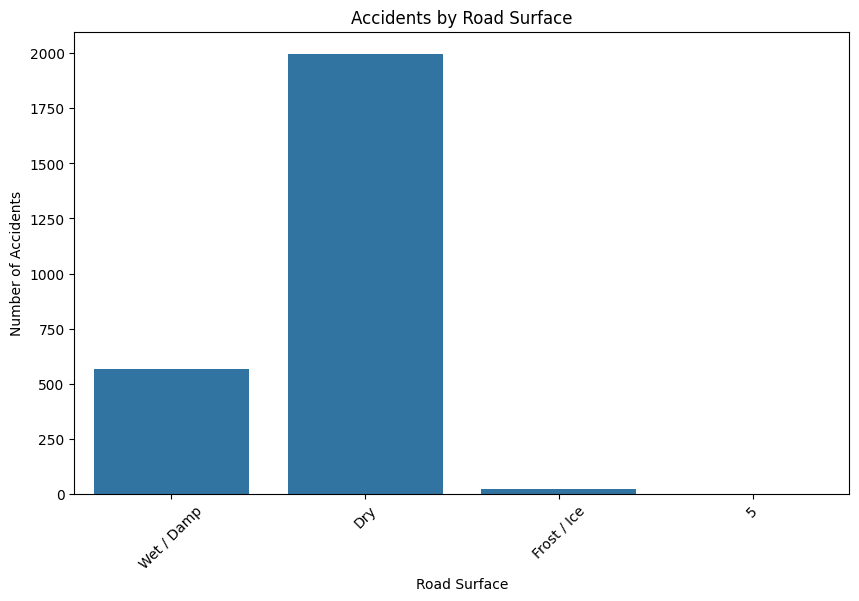

In [22]:
#Bar-Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Road Surface', data=df)
plt.title('Accidents by Road Surface')
plt.xlabel('Road Surface')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

WEATHER CONDITION ANALYSIS


In [23]:
weather_condition_counts = df['Weather Conditions'].value_counts()
print(weather_condition_counts)

Weather Conditions
Fine without high winds       2268
Raining without high winds     211
Fine with high winds            54
Raining with high winds         35
Other                            9
Fog or mist – if hazard          9
Unknown                          1
Name: count, dtype: int64


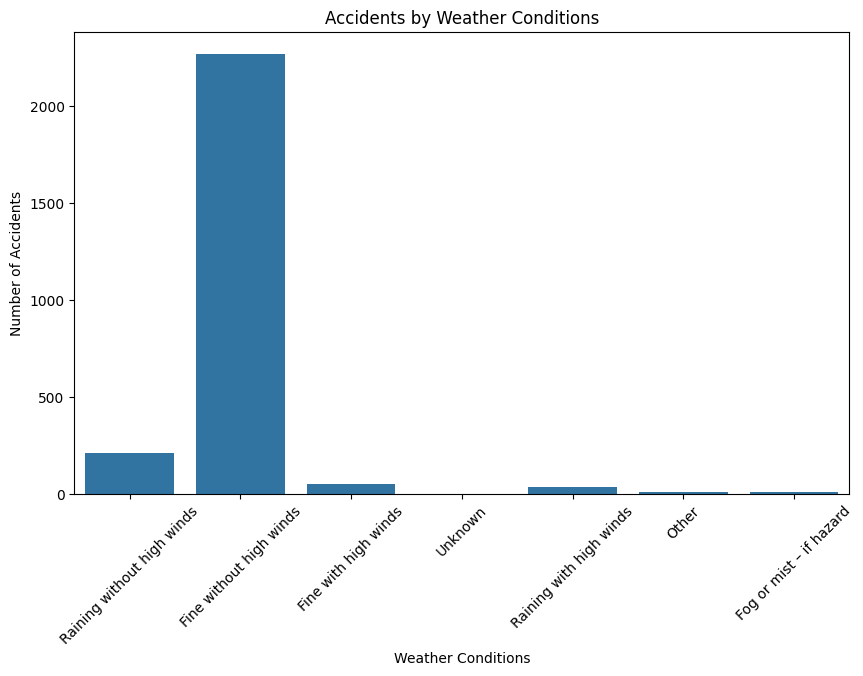

In [24]:
#Bar-plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather Conditions', data=df)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [25]:
#Accessing the 'Date' Column
df['Hour']=df['Date'].dt.hour

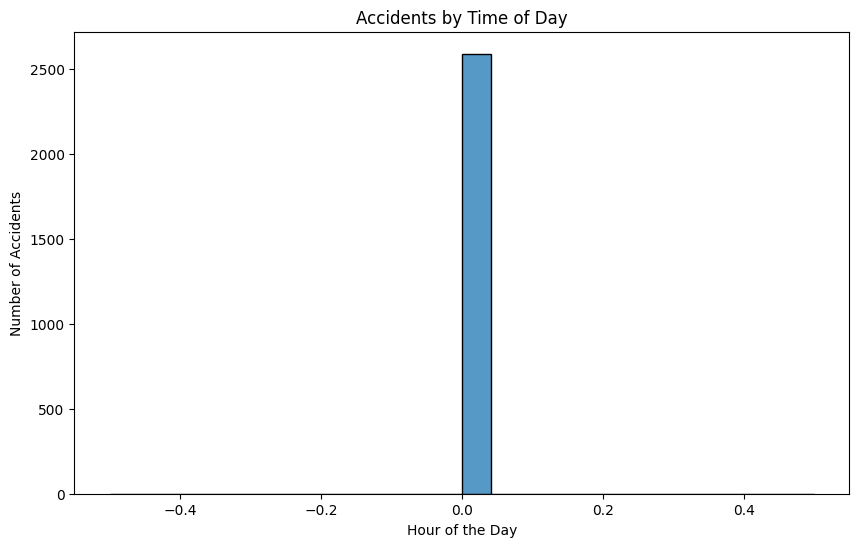

In [26]:
#creating histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=24, kde=False)
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

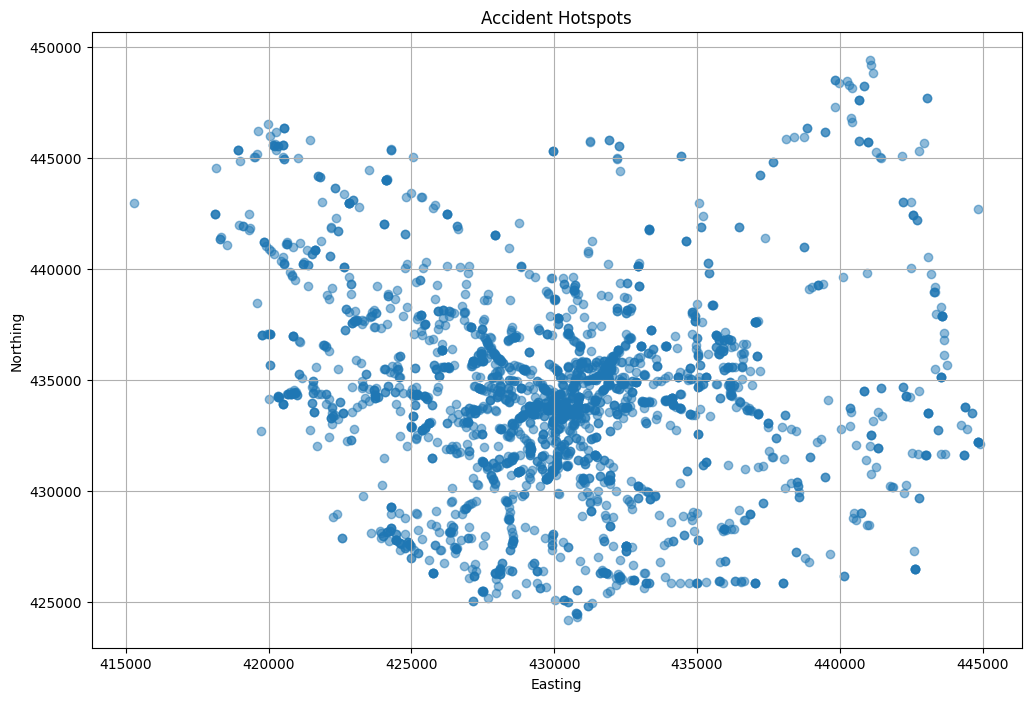

In [27]:
#using scatterplot to visualize accident hotspots
plt.figure(figsize=(12, 8))
plt.scatter(df['Easting'], df['Northing'], alpha=0.5, marker='o')
plt.title('Accident Hotspots')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.grid(True)
plt.show()

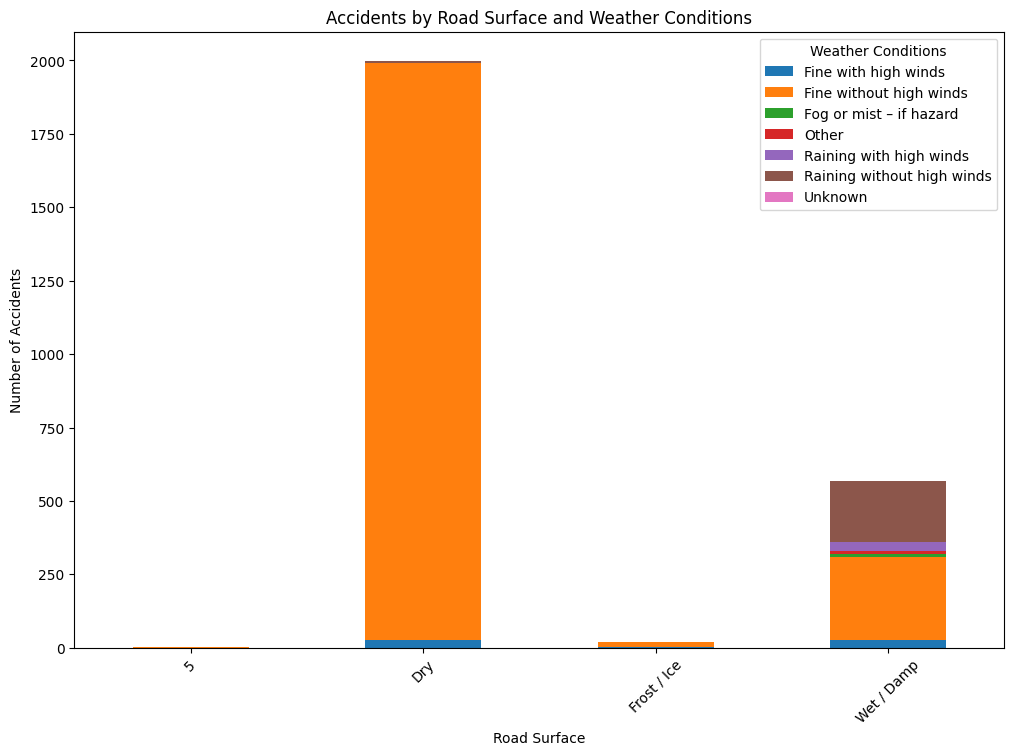

In [28]:
#bar chart of road vs weather to understand the contributing factors
cross_table = pd.crosstab(df['Road Surface'], df['Weather Conditions'])
cross_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Accidents by Road Surface and Weather Conditions')
plt.xlabel('Road Surface')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()